In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [5]:
train.shape

(891, 12)

In [6]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
train["Pclass"].unique()

array([3, 1, 2], dtype=int64)

In [8]:
train["Embarked"].unique()

array(['S', 'C', 'Q', nan], dtype=object)

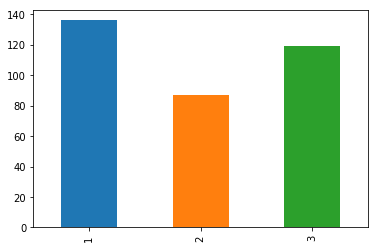

In [9]:
train[train["Survived"]==1]["Pclass"].value_counts().sort_index().plot(kind="bar")

In [10]:
pins=[0,10,20,30,40,50,60,70,80,90,100]
train["Age_range"]=pd.cut(test["Age"],pins)

In [11]:
train[train["Survived"]==1]["Age_range"].value_counts().sort_index()

(0, 10]       7
(10, 20]     18
(20, 30]     57
(30, 40]     16
(40, 50]     20
(50, 60]      5
(60, 70]      5
(70, 80]      0
(80, 90]      0
(90, 100]     0
Name: Age_range, dtype: int64

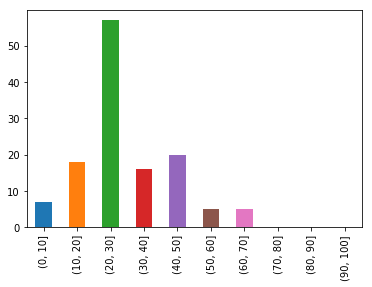

In [12]:
train[train["Survived"]==1]["Age_range"].value_counts().sort_index().plot(kind="bar")

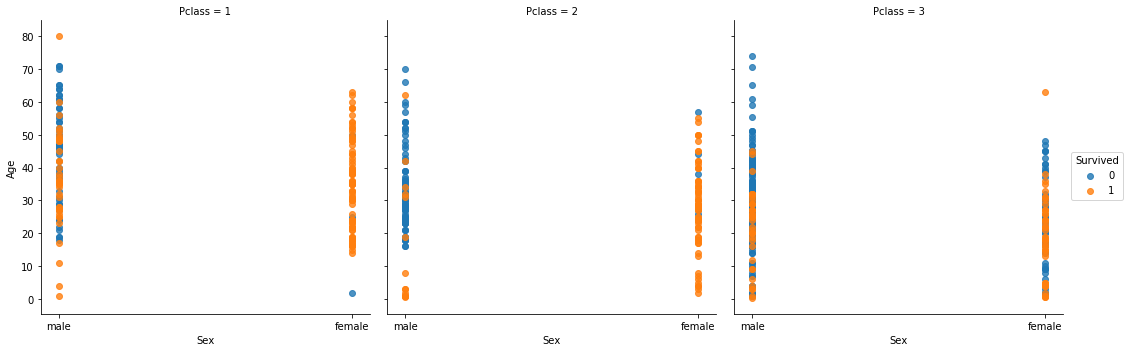

In [13]:
sns.lmplot(x='Sex',y='Age',col='Pclass',hue='Survived',fit_reg=False,data=train)

In [14]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_range
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,"(30, 40]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,"(40, 50]"
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,"(60, 70]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,"(20, 30]"
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,"(20, 30]"


In [15]:
train.dropna(axis=0, how='any',subset=["Age","Embarked" ],inplace=True)

In [16]:
train.shape

(712, 13)

In [17]:
train_f=pd.get_dummies(train,columns=["Embarked","Pclass"],drop_first=True)
train_f.head()

,PassengerId,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Age_range,Embarked_Q,Embarked_S,Pclass_2,Pclass_3
0,1,0,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,"(30, 40]",0,1,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,"(40, 50]",0,0,0,0
2,3,1,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,"(60, 70]",0,1,0,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,"(20, 30]",0,1,0,0
4,5,0,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,"(20, 30]",0,1,0,1


In [18]:
train["sex_num"]=train.Sex.map({"female":0,"male":1})


In [19]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_range,sex_num
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,"(30, 40]",1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,"(40, 50]",0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,"(60, 70]",0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,"(20, 30]",0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,"(20, 30]",1


In [20]:
train_f=train_f.loc[:,["Age","SibSp","Parch","Fare","Embarked_Q","Embarked_S","Pclass_2","Pclass_3"]]

In [21]:
train_f.head()

,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S,Pclass_2,Pclass_3
0,22.0,1,0,7.2500,0,1,0,1
1,38.0,1,0,71.2833,0,0,0,0
2,26.0,0,0,7.9250,0,1,0,1
3,35.0,1,0,53.1000,0,1,0,0
4,35.0,0,0,8.0500,0,1,0,1


In [22]:
train_x=pd.concat([train_f,train["sex_num"]],axis=1)

In [23]:
train_x.head()

,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S,Pclass_2,Pclass_3,sex_num
0,22.0,1,0,7.2500,0,1,0,1,1
1,38.0,1,0,71.2833,0,0,0,0,0
2,26.0,0,0,7.9250,0,1,0,1,0
3,35.0,1,0,53.1000,0,1,0,0,0
4,35.0,0,0,8.0500,0,1,0,1,1


In [24]:
train_x=train_x.values

In [25]:
train_x

array([[22.,  1.,  0., ...,  0.,  1.,  1.],
       [38.,  1.,  0., ...,  0.,  0.,  0.],
       [26.,  0.,  0., ...,  0.,  1.,  0.],
       ...,
       [19.,  0.,  0., ...,  0.,  0.,  0.],
       [26.,  0.,  0., ...,  0.,  0.,  1.],
       [32.,  0.,  0., ...,  0.,  1.,  1.]])

In [26]:
train_x.shape

(712, 9)

In [27]:
train_y=train.loc[:,["Survived"]]

In [28]:
train_y=train_y.values

In [29]:
train_y.shape

(712, 1)

In [30]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(train_x,train_y,test_size=.2)

In [31]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

In [32]:
knn.fit(x_train,y_train)

C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """Entry point for launching an IPython kernel.


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [33]:
knn.score(x_test,y_test)

0.6573426573426573

In [34]:
# fit model
from sklearn import svm
model=svm.SVC(kernel="linear") # svc = svm.SVC(kernel='poly',degree=3)
                              # degree: polynomial degree
model.fit(x_train,y_train)

C:\Users\USER\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [35]:
model.score(x_test,y_test)

0.7552447552447552

In [36]:
from sklearn.linear_model import LogisticRegression
log=LogisticRegression()

In [37]:
log.fit(x_train,y_train)

C:\Users\USER\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [38]:
log.score(x_test,y_test)

0.7762237762237763

In [39]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [40]:
test.shape

(418, 11)

In [41]:
test.fillna(method="bfill",inplace=True)

In [42]:
test.fillna(method="ffill",inplace=True)

In [43]:
test.shape

(418, 11)

In [44]:
test["Age"].isna().value_counts()

False    418
Name: Age, dtype: int64

In [47]:
test_f=pd.get_dummies(test,columns=["Embarked","Pclass"],drop_first=True)

In [48]:
test_f.head()

,PassengerId,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_Q,Embarked_S,Pclass_2,Pclass_3
0,892,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,B45,1,0,0,1
1,893,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,B45,0,1,0,1
2,894,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,B45,1,0,1,0
3,895,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,B45,0,1,0,1
4,896,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,B45,0,1,0,1


In [49]:
test["sex_num"]=test.Sex.map({"female":0,"male":1})

In [50]:
test_f=test_f.loc[:,["Age","SibSp","Parch","Fare","Embarked_Q","Embarked_S","Pclass_2",'Pclass_3']]

In [51]:
test_f.head()

,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S,Pclass_2,Pclass_3
0,34.5,0,0,7.8292,1,0,0,1
1,47.0,1,0,7.0000,0,1,0,1
2,62.0,0,0,9.6875,1,0,1,0
3,27.0,0,0,8.6625,0,1,0,1
4,22.0,1,1,12.2875,0,1,0,1


In [52]:
test_feature=pd.concat([test_f,test["sex_num"]],axis=1)

In [53]:
test_feature.shape

(418, 9)

In [54]:
test_feature.isna().sum()

Age           0
SibSp         0
Parch         0
Fare          0
Embarked_Q    0
Embarked_S    0
Pclass_2      0
Pclass_3      0
sex_num       0
dtype: int64

In [55]:
test_feature=test_feature.values

In [56]:
test_feature

array([[34.5,  0. ,  0. , ...,  0. ,  1. ,  1. ],
       [47. ,  1. ,  0. , ...,  0. ,  1. ,  0. ],
       [62. ,  0. ,  0. , ...,  1. ,  0. ,  1. ],
       ...,
       [38.5,  0. ,  0. , ...,  0. ,  1. ,  1. ],
       [38.5,  0. ,  0. , ...,  0. ,  1. ,  1. ],
       [38.5,  1. ,  1. , ...,  0. ,  1. ,  1. ]])

In [57]:
ans=log.predict(test_feature)

In [58]:
ans=pd.Series(ans,index=None,name="Survived")

In [59]:
ans.head()

0    0
1    0
2    0
3    0
4    1
Name: Survived, dtype: int64

In [60]:
test=test["PassengerId"]

In [61]:
test.head()

0    892
1    893
2    894
3    895
4    896
Name: PassengerId, dtype: int64

In [62]:
predicted_data=pd.concat([test,ans],axis=1)

In [63]:
predicted_data.to_csv("Survival_of_test_data.csv", index=False)